In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
df_feat = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [7]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
cancer['target'].shape

(569,)

In [26]:
canc = pd.DataFrame(cancer['target'])

In [23]:
my_data = pd.concat([df_feat, canc], axis = 1)

In [31]:
my_data.rename(columns = {0:'Target'}, inplace = True)

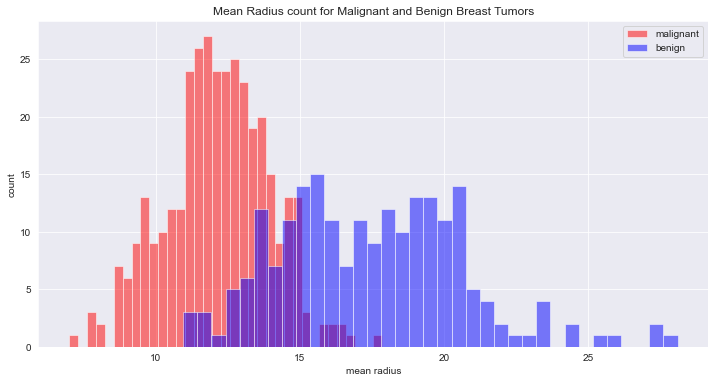

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,6))
my_data[my_data['Target']==1]['mean radius'].hist(bins = 35, alpha=0.5,color='red',label='malignant')
my_data[my_data['Target']==0]['mean radius'].hist(bins = 35, alpha=0.5,color='blue',label='benign')
plt.xlabel('mean radius')
plt.ylabel('count')
plt.title('Mean Radius count for Malignant and Benign Breast Tumors')
plt.legend()

Text(0.5, 1.0, 'Malignant Tumors are smaller than the Benign Tumors ')

<Figure size 864x432 with 0 Axes>

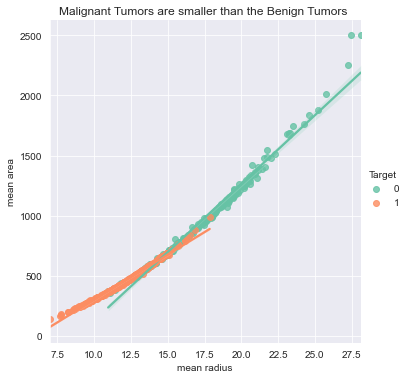

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,6))
sns.lmplot(data = my_data, x = 'mean radius', y = 'mean area', hue = 'Target', palette = 'Set2')
plt.title('Malignant Tumors are smaller than the Benign Tumors ')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df_feat
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
from sklearn.svm import SVC

In [55]:
model = SVC(gamma='auto')

In [56]:
model.fit(X_train, y_train)

SVC(gamma='auto')

In [57]:
predictions = model.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

    accuracy                           0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



[[  0  66]
 [  0 105]]


C:\Users\naamale\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naamale\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naamale\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


this error mentions that: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

what it means is that it can't have an estimation of  case 0 - where the tumor is benign. it is not surrprising since the dataset is very small. 

in this case we will need to adjust our model.
to do so we will use a grid search, to find where out model behaves the best. we will call GridSearchCV, and try different values for two parameters: 
C and gamma. they are pretty much one against the other.

C - controls the class of miscalssifications. A large C values gives a low bais and high variance. low bais because we panalize the case of misclassifications a lot. and vise versa. a low C value - we don't panalize misclassifications so it's a higher bais but in return we get lower variance.

gamma - has to do with the free parameter of the gaussian radio basis function. a small gamma means a gaussian of a large variance. a large gamma means large bais and low variance.

In [60]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001]}

In [69]:
grid = GridSearchCV(SVC(), param_grid, verbose=3) #verbose - don't leave as 0. robustness

# this could take a really long time if the data set is big:

In [64]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.

[CV 1/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 2/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 3/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 4/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 5/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 2/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 3/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 4/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 5/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 1/5] END ............................C=1000, gamma=0.001; total time=   0.0s
[CV 2/5] END ............................C=1000, gamma=0.001; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [65]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [66]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [67]:
grid_predictions = grid.predict(X_test)

In [68]:
print(classification_report(y_test,grid_predictions))
print('\n')
print(confusion_matrix(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



[[ 59   7]
 [  4 101]]


In [70]:
model = SVC()

In [72]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



[[ 56  10]
 [  3 102]]
